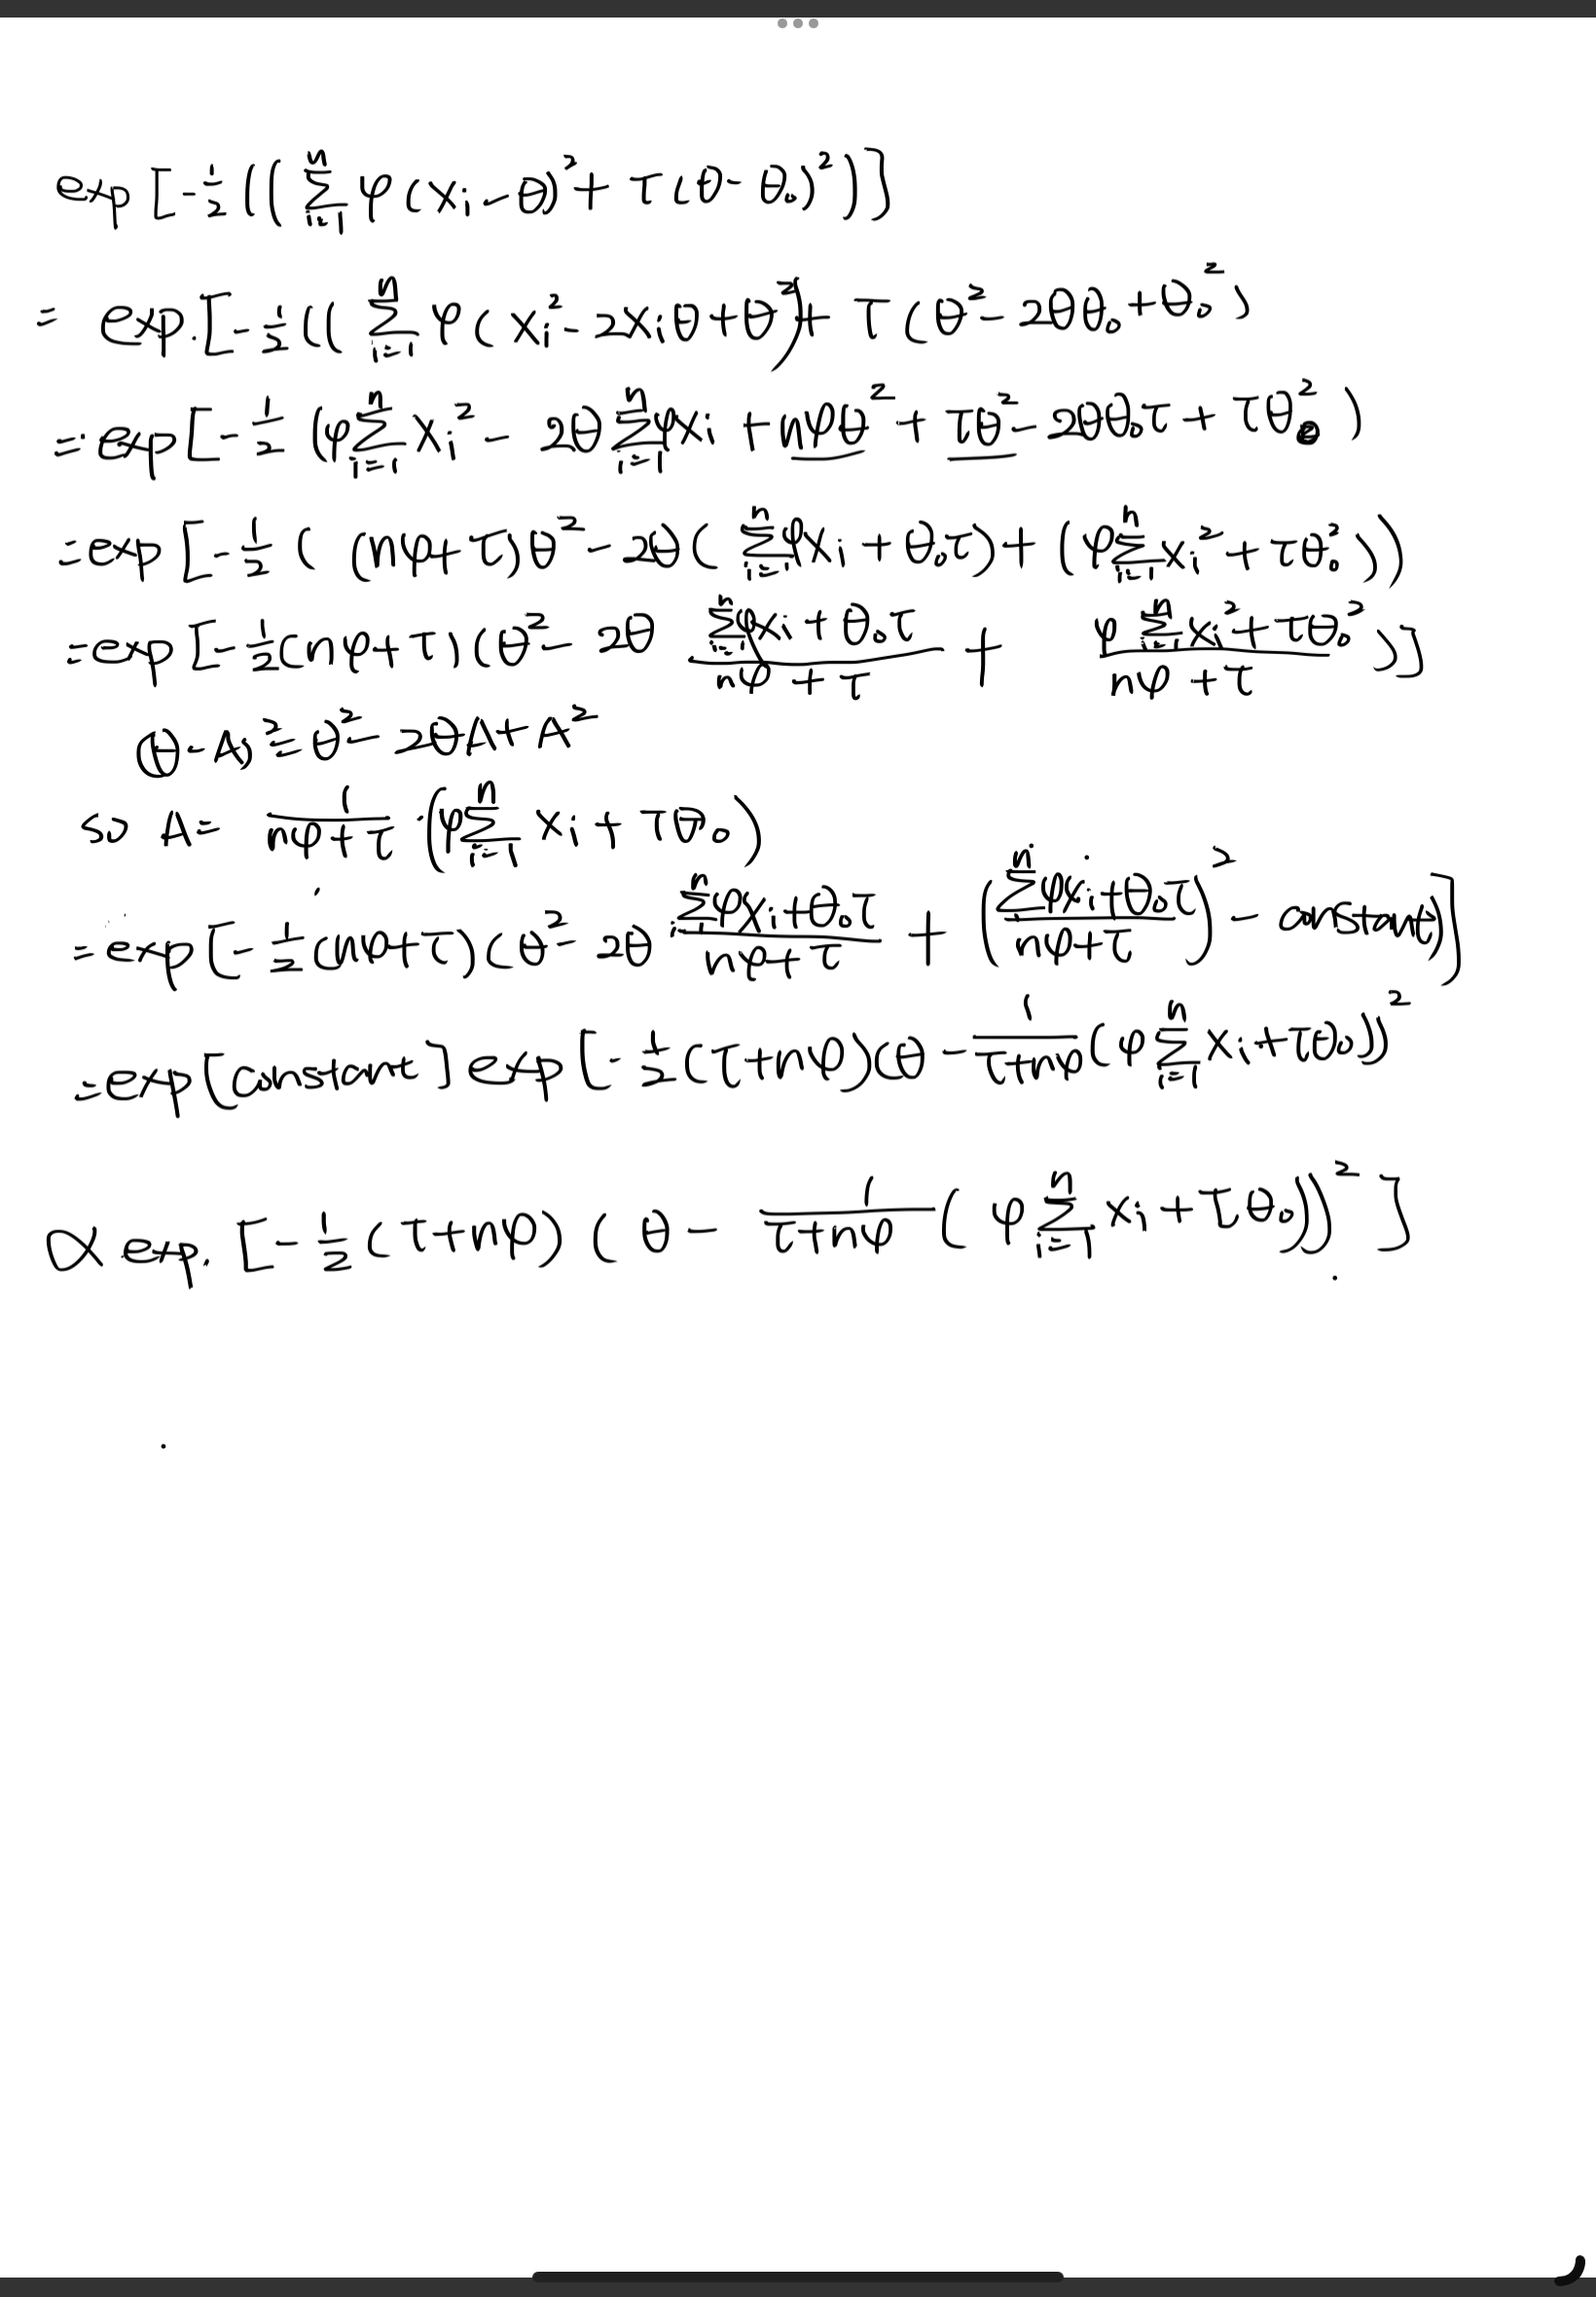

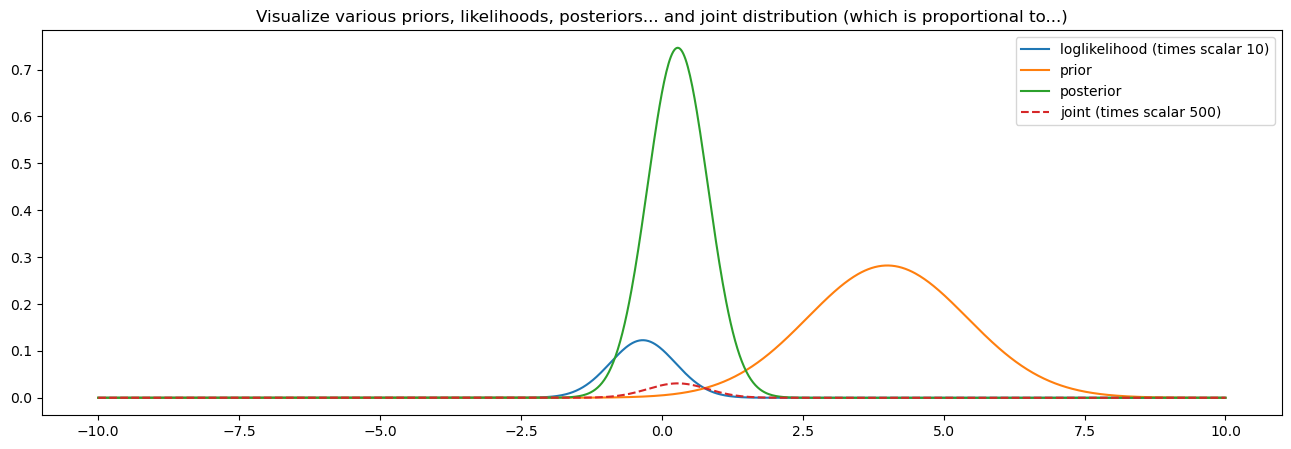

In [1]:
#classic bayes
import numpy as np; from scipy import stats; import matplotlib.pyplot as plt
n = 3; x = stats.norm(loc=0,scale=1).rvs(n); theta_0,tau = 4,1/2; parameter_domain = np.linspace(-10,10,1001); 
likelihood = stats.norm.pdf((x[:,np.newaxis])*np.ones(parameter_domain.shape), 
                            loc=parameter_domain, scale=1).prod(axis=0) # sigma=1 known
prior = stats.norm(loc=theta_0, scale=1/tau**0.5).pdf(parameter_domain) # What if p(theta) = 1?
c,c2 = 500,10; 
joint = c*likelihood*prior # elementwise multiplication 
posterior = stats.norm(loc=(tau*theta_0+x.sum())/(tau+n), scale=1/(tau+n)**0.5).pdf(parameter_domain)
plt.figure(figsize=(16,5)); plt.plot(parameter_domain, c2*likelihood, label="loglikelihood (times scalar "+str(c2)+")"); plt.plot(parameter_domain, prior, label="prior"); plt.plot(parameter_domain, posterior, label="posterior"); plt.plot(parameter_domain, joint, linestyle="--", label="joint (times scalar "+str(c)+")"); plt.legend(); plt.title("Visualize various priors, likelihoods, posteriors... and joint distribution (which is proportional to...)"); 

-0.7255527079639911
-1.678397431664386
-1.9782912989953259


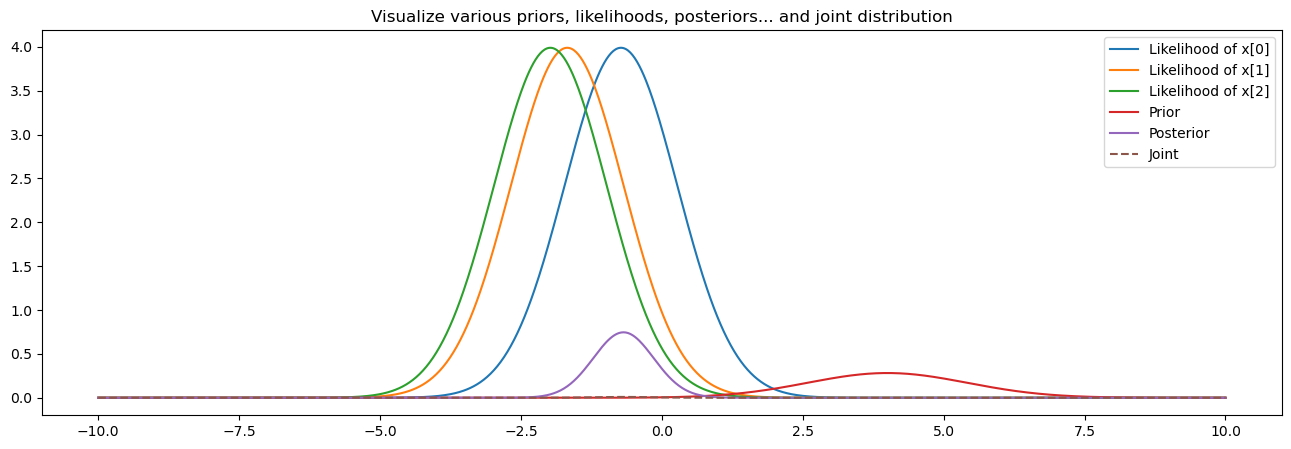

In [17]:
#question 1
import numpy as np; from scipy import stats; import matplotlib.pyplot as plt
n = 3; x = stats.norm(loc=0,scale=1).rvs(n); theta_0,tau = 4,1/2; parameter_domain = np.linspace(-10,10,1001); 
for xi in x:
    print(xi)
# Likelihood calculation for each observation
likelihoods = [stats.norm.pdf(parameter_domain, loc=x_i, scale=1) for x_i in x]
prior = stats.norm(loc=theta_0, scale=1/tau**0.5).pdf(parameter_domain) 
c,c2 = 500,10; 
joint_likelihood = np.prod(likelihoods, axis=0)
joint = c * joint_likelihood * prior
posterior = stats.norm(loc=(tau*theta_0+x.sum())/(tau+n), scale=1/(tau+n)**0.5).pdf(parameter_domain)
plt.figure(figsize=(16, 5))
for i, li in enumerate(likelihoods):
    plt.plot(parameter_domain, c2*li, label=f"Likelihood of x[{i}]")
plt.plot(parameter_domain, prior, label="Prior")
plt.plot(parameter_domain, posterior, label="Posterior")
plt.plot(parameter_domain, joint, linestyle="--", label=f"Joint")
plt.legend()
plt.title("Visualize various priors, likelihoods, posteriors... and joint distribution")
plt.show()

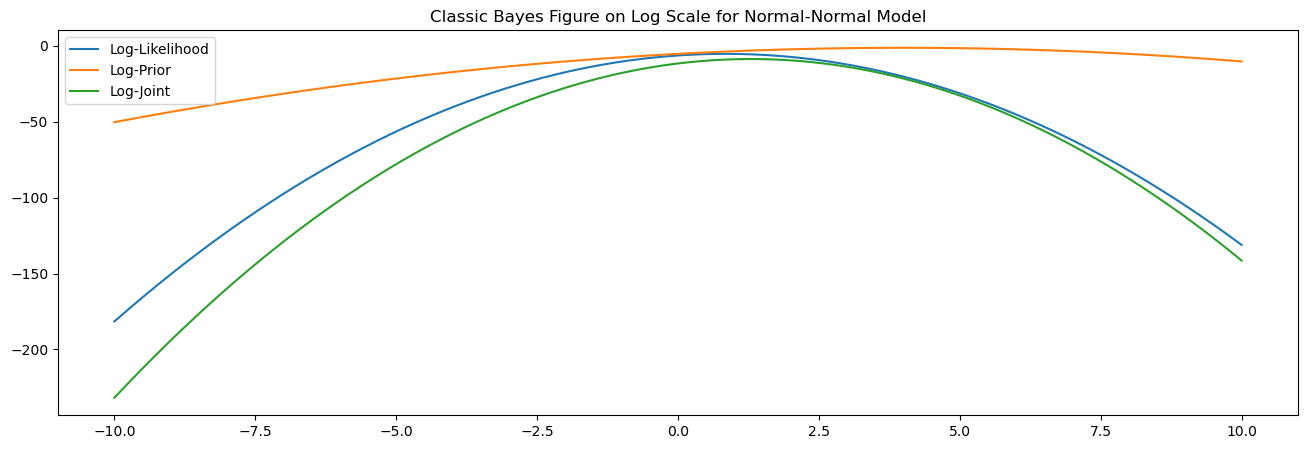

In [23]:
#question 2 for each observation
import numpy as np; from scipy import stats; import matplotlib.pyplot as plt
n = 3; x = stats.norm(loc=0,scale=1).rvs(n); theta_0,tau = 4,1/2; parameter_domain = np.linspace(-10,10,1001); 
log_likelihoods = [stats.norm.logpdf(parameter_domain, loc=x_i, scale=1) for x_i in x]
total_log_likelihood = np.sum(log_likelihoods, axis=0)
log_prior = stats.norm.logpdf(parameter_domain, loc=theta_0, scale=1/tau**0.5)
log_joint = total_log_likelihood + log_prior
#posterior = np.exp(log_joint - np.max(log_joint))
#posterior = posterior / np.trapz(posterior, parameter_domain)
plt.figure(figsize=(16, 5))
plt.plot(parameter_domain, total_log_likelihood, label="Log-Likelihood")
plt.plot(parameter_domain, log_prior, label="Log-Prior")
plt.plot(parameter_domain, log_joint, label="Log-Joint")
#plt.plot(parameter_domain, np.log(posterior), label="Log-Posterior", linestyle="--")
plt.legend()
plt.title("Classic Bayes Figure on Log Scale for Normal-Normal Model")
plt.show()

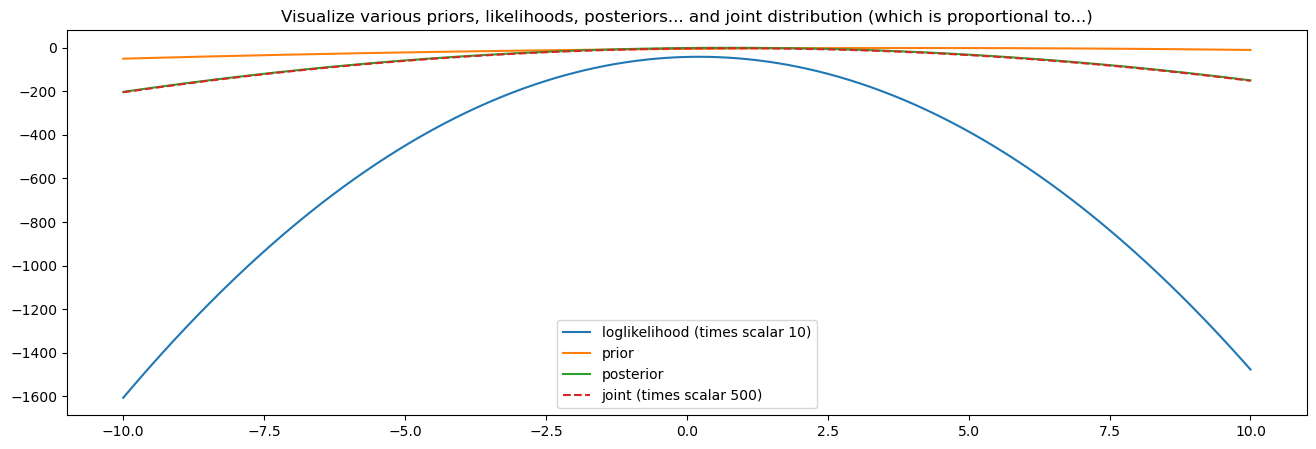

In [22]:
#question 2 continued
import numpy as np; from scipy import stats; import matplotlib.pyplot as plt
n = 3; x = stats.norm(loc=0,scale=1).rvs(n); theta_0,tau = 4,1/2; parameter_domain = np.linspace(-10,10,1001); 
likelihood = stats.norm.pdf((x[:,np.newaxis])*np.ones(parameter_domain.shape), 
                            loc=parameter_domain, scale=1).prod(axis=0)
log_likelihood = np.log(likelihood)
prior = stats.norm(loc=theta_0, scale=1/tau**0.5).pdf(parameter_domain)
log_prior = stats.norm(loc=theta_0, scale=1/tau**0.5).logpdf(parameter_domain)
c,c2 = 500,10; 
joint = c * likelihood * prior
log_joint = np.log(joint)
posterior = stats.norm(loc=(tau*theta_0+x.sum())/(tau+n), scale=1/(tau+n)**0.5).logpdf(parameter_domain)
plt.figure(figsize=(16,5)); plt.plot(parameter_domain, c2*log_likelihood, label="loglikelihood (times scalar "+str(c2)+")"); plt.plot(parameter_domain, log_prior, label="log_prior"); plt.plot(parameter_domain, posterior, label="log_posterior"); plt.plot(parameter_domain, log_joint, linestyle="--", label="log_joint (times scalar "+str(c)+")"); plt.legend(); plt.title("Visualize various priors, likelihoods, posteriors... and joint distribution (which is proportional to...)on a log sacle"); 

In [ ]:
# question 3
# By bayes'theorem, posterior distribution is proportional to the product of the likelihood and the prior. Since prior 𝑝(𝜃)∝1, prior is a constant.
# So posterior distribution is a normal distribution with the same mean and variance as the likelihood. 


In [ ]:
#question 4
#The log-likelihood is not affected by an improper prior. But an inappropriate prior can lead to a posterior whose logarithm may not make sense.
#The marginal likelihood constant does not affect the shape of the posterior distribution.